# Kaggle Exploratory Data Analysis/Visualization

For finance, I did that separately because the data was prepared somewhat differently.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
sns.set_style("whitegrid")


In [9]:
diffs = list(health.columns[-3:])

In [10]:
diffs

['diff_fomc', 'diff_fcmo', 'diff_vol']

In [49]:
metrics= list(tech.columns[3:])
metrics.remove('y')

In [59]:
trunc_metrics = ['Friday_high','Friday_volume','diff_fomc','diff_fcmo','diff_vol']

### Health Sector

In [11]:
health=pd.read_csv('data/Weekends_Health_Stocks.csv')

In [12]:
health['diff_fomc'] = (health['Friday_open']-health['Monday_close'])/health['Friday_open']

In [13]:
health['diff_fcmo'] = (health['Friday_close']-health['Monday_open'])/health['Friday_close']

In [14]:
health['diff_vol'] = (health['Friday_volume']-health['Monday_volume'])/health['Friday_volume']

In [27]:
means=[]
stdev=[]
for diff in diffs:
    x_non_dst = health.loc[health.y==0][diff].values
    x_dst = health.loc[health.y==1][diff].values
    
    means.append([np.mean(x_non_dst),np.mean(x_dst)])
    stdev.append([np.std(x_non_dst),np.std(x_dst)])

In [28]:
# Means
pd.DataFrame(means, index= diffs, columns = ['nonDST','DST'])

,nonDST,DST
diff_fomc,-0.010914,-0.008665
diff_fcmo,-0.011481,-0.006038
diff_vol,-1.065139,-0.895187


In [29]:
# Standard Deviation
pd.DataFrame(stdev, index= diffs, columns = ['nonDST','DST'])

,nonDST,DST
diff_fomc,3.005940,0.231379
diff_fcmo,3.030763,0.217603
diff_vol,28.625346,14.741246


In [64]:
UNH=health[health['ticker']=='UNH']

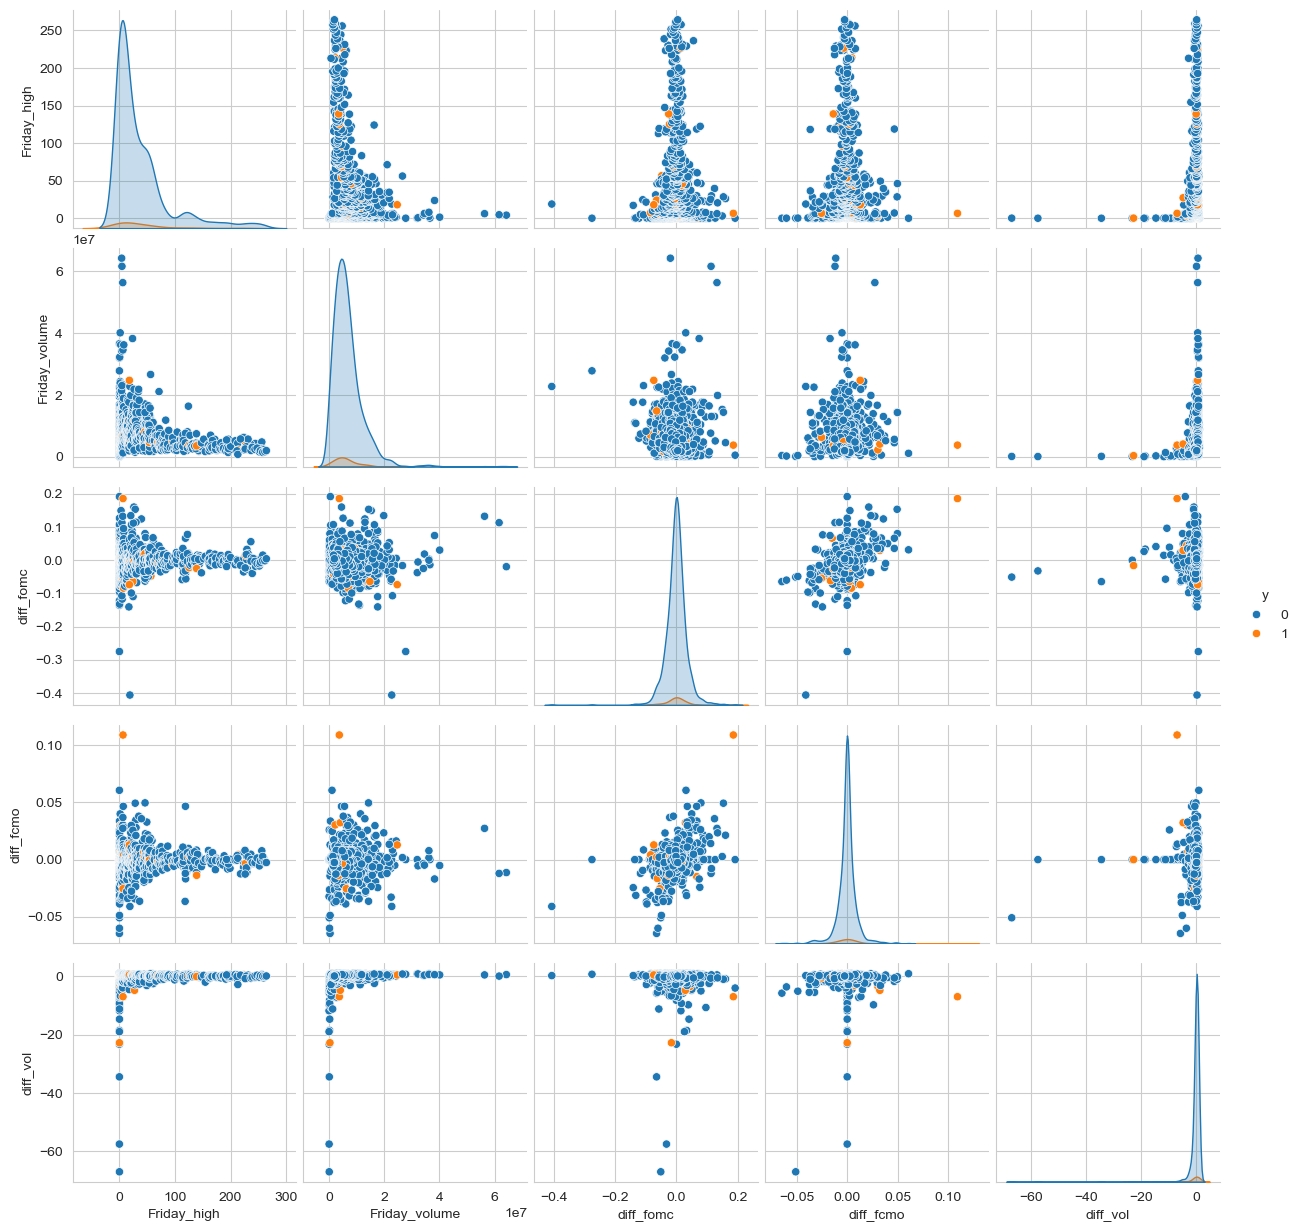

In [66]:
sns.pairplot(data = UNH,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')

plt.show()

### Tech

In [19]:
tech=pd.read_csv('data/Weekends_Tech_Stocks.csv')

In [20]:
tech['diff_fomc'] = (tech['Friday_open']-tech['Monday_close'])/tech['Friday_open']

In [21]:
tech['diff_fcmo'] = (tech['Friday_close']-tech['Monday_open'])/tech['Friday_close']

In [22]:
tech['diff_vol'] = (tech['Friday_volume']-tech['Monday_volume'])/tech['Friday_volume']

In [30]:
means=[]
stdev=[]
for diff in diffs:
    non_dst = tech.loc[tech.y==0][diff].values
    dst = tech.loc[tech.y==1][diff].values
    
    means.append([np.mean(non_dst),np.mean(dst)])
    stdev.append([np.std(non_dst),np.std(dst)])

In [31]:
# Means
pd.DataFrame(means, index= diffs, columns = ['nonDST','DST'])

,nonDST,DST
diff_fomc,-0.032774,-0.000774
diff_fcmo,-0.033012,-0.000032
diff_vol,-1.132314,-0.648536


In [32]:
# Standard Deviation
pd.DataFrame(stdev, index= diffs, columns = ['nonDST','DST'])

,nonDST,DST
diff_fomc,4.546926,0.057416
diff_fcmo,4.630034,0.023717
diff_vol,72.394935,6.584542


The dataset is too large but we'll focus on one stock to visualize

In [41]:
apple=tech[tech['ticker']=='AAPL']

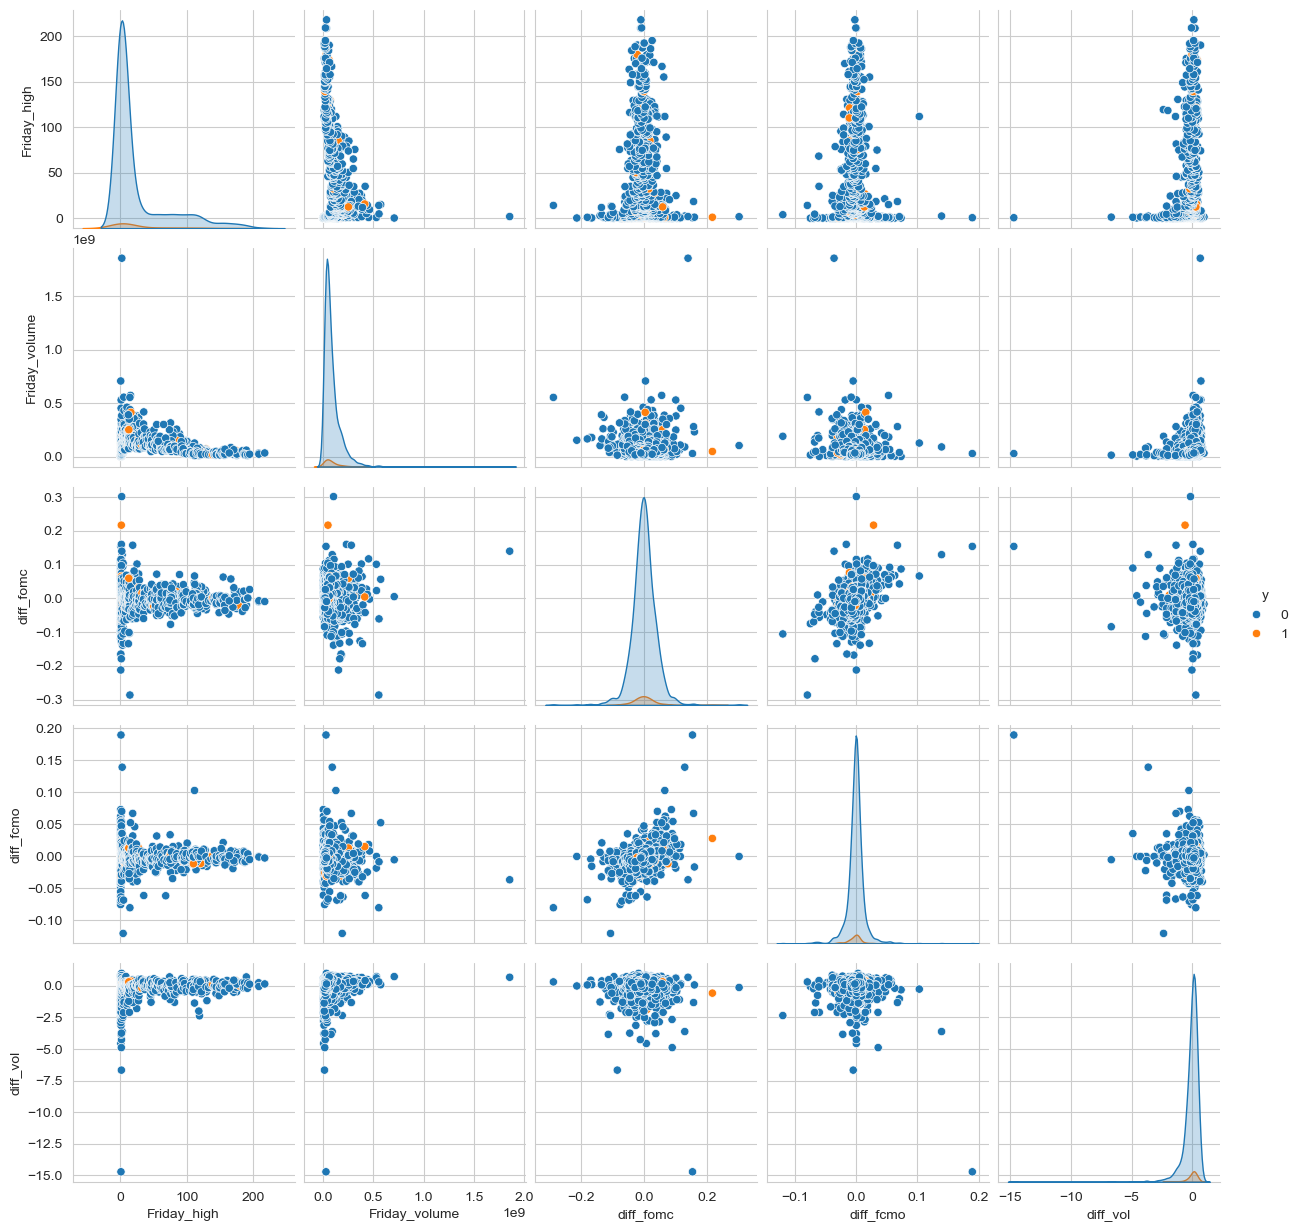

In [60]:
sns.pairplot(data = apple,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')

plt.show()

### Consumer Services

In [33]:
consumer=pd.read_csv('data/Weekends_Consumer_Stocks.csv')

In [34]:
consumer['diff_fomc'] = (consumer['Friday_open']-consumer['Monday_close'])/consumer['Friday_open']

In [35]:
consumer['diff_fcmo'] = (consumer['Friday_close']-consumer['Monday_open'])/consumer['Friday_close']

In [36]:
consumer['diff_vol'] = (consumer['Friday_volume']-consumer['Monday_volume'])/consumer['Friday_volume']

In [37]:
means=[]
stdev=[]
for diff in diffs:
    non_dst = consumer.loc[consumer.y==0][diff].values
    dst = consumer.loc[consumer.y==1][diff].values
    
    means.append([np.mean(non_dst),np.mean(dst)])
    stdev.append([np.std(non_dst),np.std(dst)])

In [38]:
# Means
pd.DataFrame(means, index= diffs, columns = ['nonDST','DST'])

,nonDST,DST
diff_fomc,-0.004457,-0.001353
diff_fcmo,-0.003654,0.000044
diff_vol,-8.582464,-0.863043


In [39]:
# Standard Deviation
pd.DataFrame(stdev, index= diffs, columns = ['nonDST','DST'])

,nonDST,DST
diff_fomc,1.397367,0.044744
diff_fcmo,1.318142,0.021917
diff_vol,5173.613152,34.262353


In [42]:
amazon=consumer[consumer['ticker']=='AMZN']

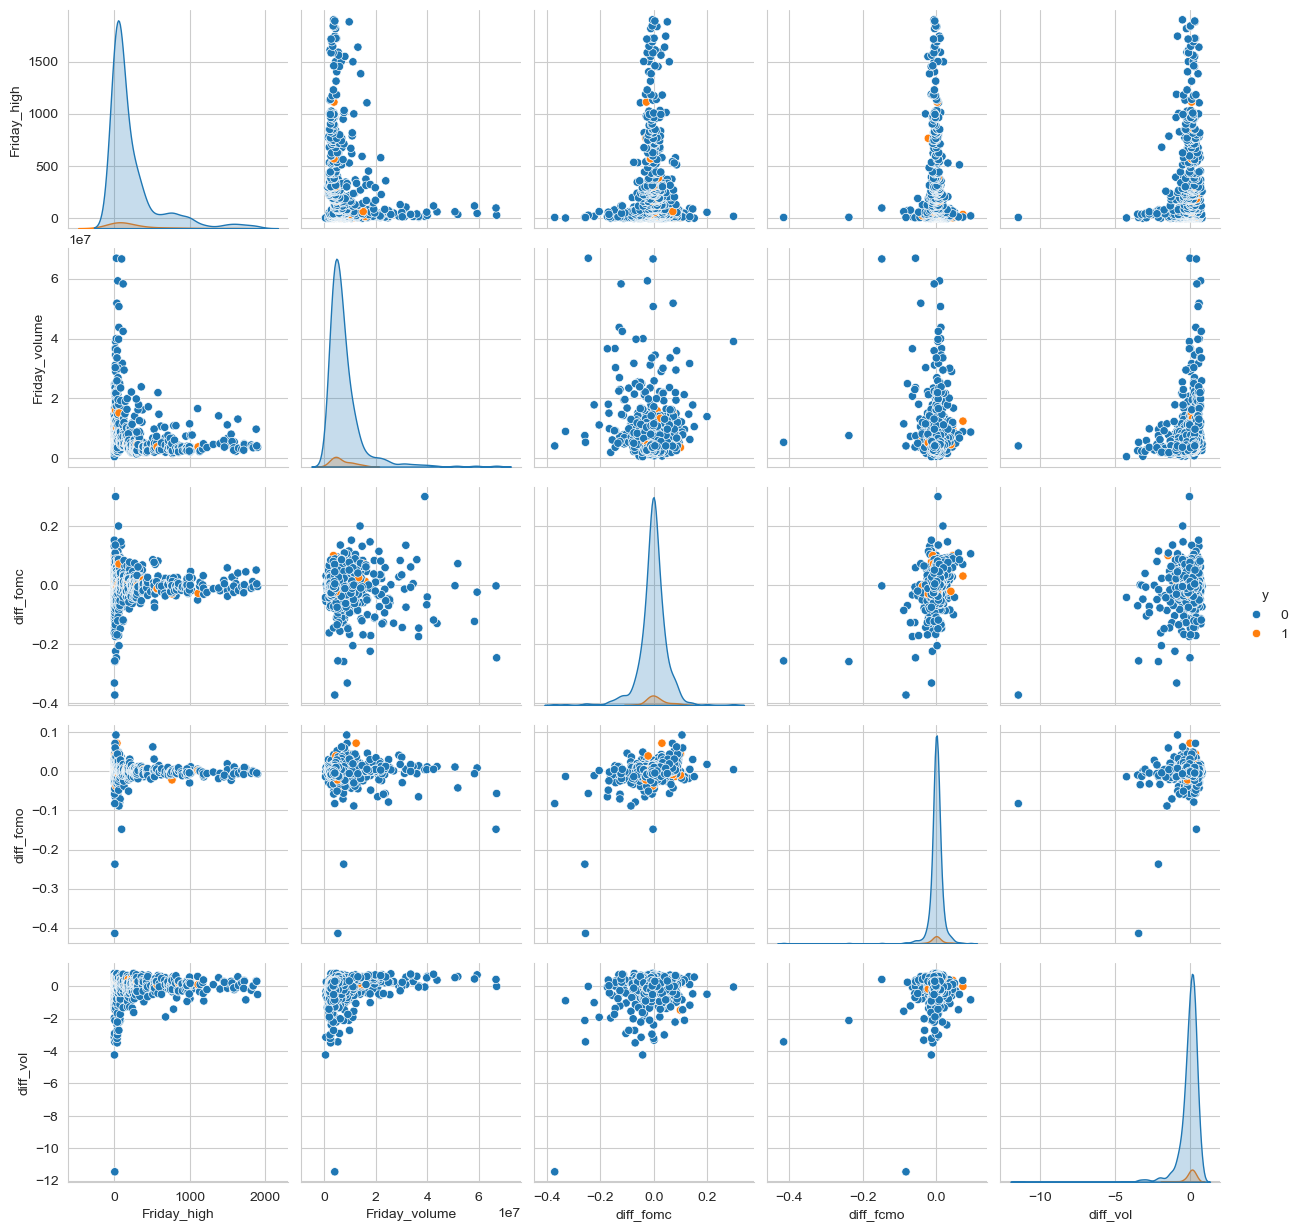

In [61]:
sns.pairplot(data = amazon,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')

plt.show()